# Import Package

In [ ]:
from jcopml.tuning import random_search_params as rsp
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

# Import Dataset

In [ ]:
X, y = load_breast_cancer(return_X_y = True)
X.shape, y.shape

((569, 30), (569,))

# Melihat Missing Value

In [ ]:
df = pd.DataFrame(X)
df["Target"] = y
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [ ]:
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
Target    0
dtype: int64

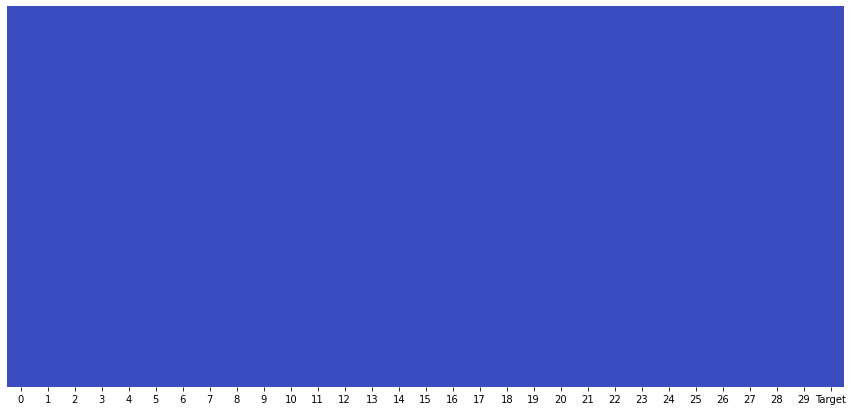

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='coolwarm');

# Splitted Dataset

In [ ]:
X = df.drop(columns='Target')
y = df.Target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [ ]:
models_train = []
models_best_score = []
models_test = []
name_models = []

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
num_pip = Pipeline([
  ('imputer', SimpleImputer(strategy="mean")),
  ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer([
  ('numerical', num_pip, X_train.columns)
])

pipeline = Pipeline([
  ('prep', preprocessor),
  ('algo', LogisticRegression())
])

params = {
    "algo__fit_intercept": [True, False],
    "algo__C": np.logspace(-3, 3, 7)
}

model_Logistic = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, verbose=1)
model_Logistic.fit(X_train, y_train)

model_train_log = model_Logistic.score(X_train, y_train)
model_test_log = model_Logistic.score(X_test, y_test)
model_best_log = model_Logistic.best_score_

models_train.append(model_train_log)
models_test.append(model_test_log)
models_best_score.append(model_best_log)
name_models.append("Logistic Linier")

print(model_Logistic.best_params_)
print(model_Logistic.score(X_train, y_train),model_Logistic.best_score_, model_Logistic.score(X_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 1.0, 'algo__fit_intercept': True}
0.9874371859296482 0.9697919040024304 0.9883040935672515


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
num_pip = Pipeline([
  ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
  ('numerical', num_pip, X_train.columns)
])

pipeline = Pipeline([
  ('prep', preprocessor),
  ('algo', GaussianNB())
])

param_grid_nb = {
    'algo__var_smoothing': np.logspace(0,-9, num=100)
}

model_naiveBayes = GridSearchCV(pipeline, param_grid_nb, verbose=1, cv=10, n_jobs=-1)
model_naiveBayes.fit(X_train, y_train)

model_train_naiveBayes = model_naiveBayes.score(X_train, y_train)
model_test_naiveBayes = model_naiveBayes.score(X_test, y_test)
model_best_naiveBayes = model_naiveBayes.best_score_

models_train.append(model_train_naiveBayes)
models_test.append(model_test_naiveBayes)
models_best_score.append(model_best_naiveBayes)
name_models.append("Naive Bayes")

print(model_naiveBayes.best_params_)
print(model_naiveBayes.score(X_train, y_train),model_naiveBayes.best_score_, model_naiveBayes.score(X_test, y_test))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'algo__var_smoothing': 0.15199110829529336}
0.9422110552763819 0.9346794871794872 0.9473684210526315


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid_nb = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8,10,12]
}

model_Dec_tree = GridSearchCV(estimator=DecisionTreeClassifier(), 
                                param_grid=param_grid_nb, 
                                verbose=1, 
                                cv=10, 
                                n_jobs=-1)
model_Dec_tree.fit(X_train, y_train)

model_train_DecTree = model_Dec_tree.score(X_train, y_train)
model_test_DecTree = model_Dec_tree.score(X_test, y_test)
model_best_DecTree = model_Dec_tree.best_score_

models_train.append(model_train_DecTree)
models_test.append(model_test_DecTree)
models_best_score.append(model_best_DecTree)
name_models.append("Decesion Tree")

print(model_Dec_tree.best_params_)
print(model_Dec_tree.score(X_train, y_train),model_Dec_tree.best_score_, model_Dec_tree.score(X_test, y_test))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
{'criterion': 'entropy', 'max_depth': 12}
1.0 0.939551282051282 0.9590643274853801


# XGBoost

In [ ]:
!pip install luwiji

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgboost = RandomizedSearchCV(estimator=XGBClassifier(n_jobs=-1, random_state=42), 
                                param_distributions=rsp.xgb_params, 
                                n_iter=100,
                                verbose=1, 
                                cv=3, 
                                n_jobs=-1)
model_xgboost.fit(X_train, y_train)

model_train_xgboost = model_xgboost.score(X_train, y_train)
model_test_xgboost = model_xgboost.score(X_test, y_test)
model_best_xgboost = model_xgboost.best_score_

models_train.append(model_train_xgboost)
models_test.append(model_test_xgboost)
models_best_score.append(model_best_xgboost)
name_models.append("XGBoost")

print(model_xgboost.best_params_)
print(model_xgboost.score(X_train, y_train),model_xgboost.best_score_, model_xgboost.score(X_test, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'algo__colsample_bytree': 0.18044589063828517, 'algo__gamma': 2, 'algo__learning_rate': 0.16491719433987026, 'algo__max_depth': 10, 'algo__n_estimators': 179, 'algo__reg_alpha': 0.5130551855922006, 'algo__reg_lambda': 0.0025596567717499747, 'algo__subsample': 0.6933746685388666}
1.0 0.967304625199362 0.9649122807017544


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params = {
    "n_estimators": [100, 150, 200],
    "max_depth": [20, 50, 80],
    "max_features": [0.3, 0.6, 0.8],
    "min_samples_leaf": [1, 5, 10]
}
model = RandomForestClassifier(n_jobs=-1, random_state=42)
model_RandForest = GridSearchCV(estimator=model, 
                                param_grid=params,
                                verbose=1, 
                                cv=3, 
                                n_jobs=-1)
model_RandForest.fit(X_train, y_train)

model_train_RandForest = model_RandForest.score(X_train, y_train)
model_test_RandForest = model_RandForest.score(X_test, y_test)
model_best_RandForest = model_RandForest.best_score_

models_train.append(model_train_RandForest)
models_test.append(model_test_RandForest)
models_best_score.append(model_best_RandForest)
name_models.append("Random Forest")

print(model_RandForest.best_params_)
print(model_RandForest.score(X_train, y_train),model_RandForest.best_score_, model_xgboost.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 1, 'n_estimators': 150}
1.0 0.957222601959444 0.9649122807017544


# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
num_pip = Pipeline([
  ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer([
  ('numerical', num_pip, X_train.columns)
])

pipeline = Pipeline([
  ('prep', preprocessor),
  ('algo', SVC(max_iter=500))
])

params = {"algo__gamma": np.logspace(-3, 3, 7),
          "algo__C": np.logspace(-3, 3, 7)
        }
model_SVC = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, verbose=1)
model_SVC.fit(X_train, y_train)

model_train_SVC = model_SVC.score(X_train, y_train)
model_test_SVC = model_SVC.score(X_test, y_test)
model_best_SVC = model_SVC.best_score_

models_train.append(model_train_SVC)
models_test.append(model_test_SVC)
models_best_score.append(model_best_SVC)
name_models.append("SVM")

print(model_SVC.best_params_)
print(model_SVC.score(X_train, y_train),model_SVC.best_score_, model_SVC.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits
{'algo__C': 100.0, 'algo__gamma': 0.001}
0.9899497487437185 0.9723171565276828 0.9824561403508771


# Plot hasil train model

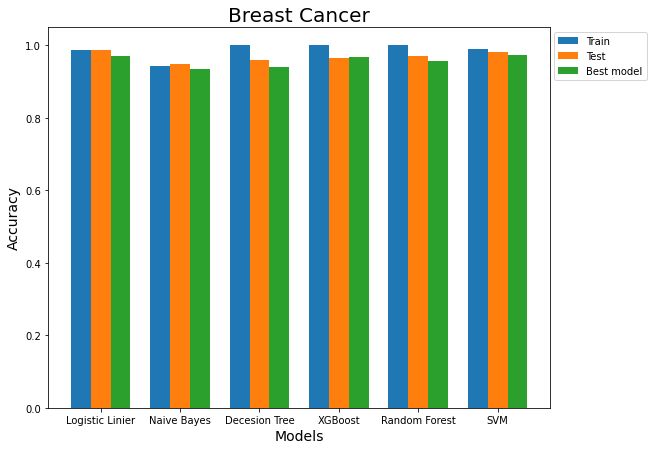

In [ ]:
fig = plt.figure() 
fig.set_size_inches(9,7)
w = 0.25
bar1 = np.arange(len(name_models))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

plt.bar(bar1, models_train, w, label='Train')
plt.bar(bar2, models_test, w, label='Test')
plt.bar(bar3, models_best_score, w, label='Best model')

plt.legend(loc="upper center", bbox_to_anchor = (1.1,1))
plt.xticks(bar2, name_models)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Breast Cancer',fontsize=20)
# plt.savefig('breats_Cancer.png')
plt.show()

# Save Best Model

In [ ]:
import pickle
filename = 'Breast_cancer_model.sav'
pickle.dump(model_Logistic, open(filename, 'wb'))